## Victor Moraes - 2016027600

## Quarto trabalho pratico de reconhecimento de padrões
# SVM - Máquinas de vetores de suporte Parte 2


# Introdução

Neste trabalho, será aplicado o classificador SVM na resolução de um problema de classificação sintético, analisando aspectos e estratégias de sintonia de hiperparametros.

Neste exercı́cio o(a) aluno(a) aplicará o classificador SVM na resolução de um
problema de classificação real.  
O aluno deverá seguir os seguintes passos:  
1. Carregar a base de dados;   
2. Separar os dados em treinamento e teste; 
3. Treinar a SVM (atenção para a definição dos parâmetros do kernel escolhido
e do parâmetro C de regularização da SVM.);  
O aluno deve treinar uma SVM para resolver o problema de classificação
de tipos de vidros do banco de dados Glass a partir de suas caracterı́sticas
quı́micas. Ele possui 214 instâncias de 10 atributos. Entradas numéricas e
variável de saida categórica Este banco de dados já é nativo do R para aqueles
que estão utilizando o R mas pode ser encontrado no UCI Machine Learning
Repositóry.  
No relatório deverá ser mostrado a acurácia média e desvio padrão para 10
experimentos variando o conjunto de treinamento e teste. Apresentar também
quais os parâmetros definidos por você e como eles foram definidos, como por
exemplo o parâmetro C.

## 1- Conjunto de testes.
Inicialmente importaremos as bibliotecas necessárias e em seguida criaremos o conjunto de amostras. 



In [296]:
import numpy as np
import pandas as pd
from numpy.random import normal, uniform
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, ScalarFormatter
from sklearn.model_selection import train_test_split
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [297]:
glass = pd.read_csv('glass.csv').dropna()
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [298]:
labels = pd.read_csv('classifications.csv').dropna()
labels.head()

,building_windows_float_processed,building_windows_non_float_processed,vehicle_windows_float_processed,vehicle_windows_non_float_processed (none in this database),containers,tableware,headlamps
0,1,2,3,4,5,6,7


<p style="page-break-after:always;"></p>

## 2. Separação de conjuntos de treinamento e testes

Neste ponto é realizada a separação de amostras de treino e validação iniciais.


In [299]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [300]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

In [359]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

enable_scalar = True

In [360]:
X = glass.iloc[:,1:-1].to_numpy()
print(X.shape)
print(X[0:5,:])

y = glass.iloc[:,-1:].to_numpy().ravel()
print(y.shape)
print(y[0:5])



(214, 9)
[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]
(214,)
[1 1 1 1 1]


In [ ]:
sc_train = StandardScaler().fit(X_train)
sc_test = StandardScaler().fit(X_test)
sc_all = StandardScaler().fit(X)

if(enable_scalar == True):
    X_train_std = sc_train.transform(X_train)
    X_test_std = sc_test.transform(X_test)
    X_std = sc_all.transform(X)
else:
    X_train_std = X_train 
    X_test_std = sc_test.transform(X_test)
    X_std = sc_all.transform(X)
        

In [361]:
def print_score(x,y,clf):
    score = 100* clf.score(X_test,y_test)
    print("Score de: {:2.2f}%\n".format(score))

## 3 Treinamento inicial do modelo, com parametros a determinar.

Será utilizado a implementação SVC, ou classificação de vetores de suporte. Nesta implementação é permitido que os pontos não sejam necessariamente linearmente separáveis, sendo o desvio tolerável ditado pelo parâmetro C. 
Para determinar isso foi feito uma busca em rede para validar qual kernel e quais parametros possuem o melhor desempenho. A busca em rede conta com validação cruzada kfold com 5 conjuntos para cada classificador testado. 

Obtivemos que o kernel rbf ( radial basis function ), ou função radial, foi a de melhor acurácia.

Outro parametro do kernel RBF é o gamma, representado na equação a seguir por sigma. É um parâmetro do kernel que determina a geometria e curvatura do superplano de classificação.    
Aqui é utilizado o kernel radial : $K(x_i,x_j)= exp(-\frac{||x_i-x_j||}{2\sigma^2})$


Para a escolha de C e gama, adiante será feita varredura e de forma que evite overfitting e maximize a média de acertos.

In [363]:
kernels = ['poly', 'rbf']
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#C_range = np.logspace(-3,6,2)
C_range = np.logspace(0,7,50)
#coef_0_range = np.linspace(-100,100,10)

#coef_0_range = np.linspace(-10,10,5)
param_grid = {
    'kernel':kernels,
    'C':C_range,
    #'coef0':coef_0_range,
    #'break_ties':[False],
    #'probability':[False]
}

grid = GridSearchCV(SVC(break_ties=True, probability=True), param_grid=param_grid, n_jobs=3, verbose=True)
grid.fit(X_std, y)
grid.best_params_

best_estimator = grid.best_estimator_
best_estimator.fit(X_train_std,y_train)
final_score = best_estimator.score(X_test_std, y_test)
print("The best parameters are {} with a score of {:2.2f} %"
.format(grid.best_params_, 100*final_score))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are {'C': 1.0, 'kernel': 'rbf'} with a score of 67.44 %


In [386]:
C_range = np.logspace(2, 3, 50)
gamma_range = np.logspace(-3, -2, 50)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=3)
grid.fit(X_std, y)
grid.best_params_

best_estimator = grid.best_estimator_
best_estimator.fit(X_train_std,y_train)
final_score = best_estimator.score(X_test_std, y_test)
print("The best parameters are {} with a score of {:2.2f} %"
.format(grid.best_params_, 100*final_score))

The best parameters are {'C': 754.3120063354615, 'gamma': 0.004498432668969444} with a score of 79.07 %


Aqui é apresentado o gráfico de acurácia da busca de grid, identificando õtimos locais de maior desempenho.

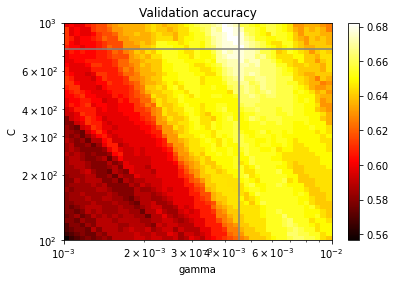

In [387]:
scores_plot = np.reshape(grid.cv_results_['mean_test_score'],(C_range.shape[0],gamma_range.shape[0]))
gamma_plot = grid.cv_results_['param_gamma']
c_plot = grid.cv_results_['param_C']
plt.axvline(grid.best_params_['gamma'], color='gray')
plt.axhline(grid.best_params_['C'], color='gray')
X_mesh,Y_mesh=np.meshgrid(gamma_range,C_range)
Z = scores_plot
im = plt.pcolor(X_mesh,Y_mesh,Z, cmap=plt.cm.hot)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar(im, orientation='vertical')
plt.title('Validation accuracy')
plt.show()

Em seguida realizamos a validação com todo conjunto de testes, obtendo acurácia de 76%

In [388]:
C_range = np.logspace(2, 3, 20)
gamma_range = np.logspace(-3, -2, 20)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=3)
grid.fit(X_std, y)
grid.best_params_


best_estimator = grid.best_estimator_
best_estimator.fit(X_train_std,y_train)
final_score = best_estimator.score(X_test_std, y_test)
print("The best parameters are {} with a score of {:2.2f} %"
.format(grid.best_params_, 100*final_score))

The best parameters are {'C': 784.7599703514607, 'gamma': 0.004281332398719396} with a score of 76.74 %


## 3.d Escolha de modelo
Como pode-se ver a seguir, a biblioteca seleciona o primeiro melhor estimador na métrica de escore, que foi o seguinte:  
SVC('C': 784.7599703514607, 'gamma': 0.004281332398719396)



# Cross validation

O estimador será validado utilizando cross validation kfold, de 10 grupos.

In [389]:
scores = cross_val_score(best_estimator, X_std, y, cv=10)
print()
print(scores)


mean_score = np.mean(scores) * 100
mean_std = np.std(scores) * 100

print('Score medio:{:.2f}%, desvio medio:{:.2f}%'.format(mean_score, mean_std))
print(10*'\n')



[0.72727273 0.63636364 0.68181818 0.77272727 0.71428571 0.71428571
 0.80952381 0.80952381 0.66666667 0.66666667]
Score medio:71.99%, desvio medio:5.75%











/home/vektor/.virtualenvs/science/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Portanto temos que a acuracia final foi de 71.99%, com desvio médio de 5.75%.

A baixa acuracia se deve, provavelmente, a quantidade baixa de amostras por classe.

## Demonstração de predição

Aqui é feita uma demonstração e faz a previsão corretamente da amostra de vidro do tipo 2.

In [405]:
glass.iloc[70]

Id       71.00000
 RI       1.51574
 Na      14.86000
 Mg       3.67000
 Al       1.74000
 Si      71.87000
 K        0.16000
 Ca       7.36000
 Ba       0.00000
 Fe       0.12000
 Type     2.00000
Name: 70, dtype: float64

In [409]:
sample = glass.iloc[70].to_numpy()[1:-1].reshape(1, -1)
sample

array([[ 1.51574, 14.86   ,  3.67   ,  1.74   , 71.87   ,  0.16   ,
         7.36   ,  0.     ,  0.12   ]])

In [410]:
best_estimator.predict(sc_all.transform(sample))

array([2])

# Conclusão


Neste trabalho foi aplicar o algoritmo de vetores de suporte de maquina, para um problema prático de classificação. Apresentou baixa acurácia, mesmo com sintonia de hiperparametros, mas pode se tratar do fato de numero de funcionalidades proximo ao de numero de classes e baixa amostragem.

## Referências:

C support vector classification - SciKitLearn
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  


Gridsearch - SciKitLearn
https://scikit-learn.org/stable/modules/grid_search.html#grid-search